<a href="https://colab.research.google.com/github/AllanLiao-Github/test/blob/master/Top_100_and_Rank_100_of_filems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

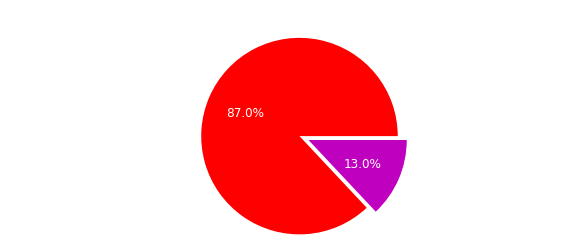

Box Office Rank,IMDB Rank,Box Office,Film,Year
1,64,"$858,373,000",Avengers: Endgame,2019
4,60,"$678,815,482",Avengers: Infinity War,2018
11,3,"$535,234,033",The Dark Knight,2008
18,25,"$460,998,507",Star Wars: Episode IV - A New Hope,1977
20,71,"$448,139,099",The Dark Knight Rises,2012
27,33,"$422,783,777",The Lion King,1994
44,6,"$377,845,905",The Lord of the Rings: The Return of the King,2003
56,14,"$342,551,365",The Lord of the Rings: The Two Towers,2002
61,39,"$335,251,773",Joker,2019
66,11,"$330,455,270",Forrest Gump,1994


In [0]:
'''
抓取 IMBD 評價最高前100名電影。抓取 Box Office Mojo 累計最高票房紀錄的前100名電影。
將此兩份資料交叉比對，找出共同存在兩個排行榜中的電影。
並統計以上比對後的電影票房總額占比於票房前100名電影總額的占比。(繪圖)
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#--- IMDB電影評價前100名
url1 = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
li = pd.read_html(url1)
df_top = li[-1]
df_top = df_top.iloc[0:100,1:3]  #取前100筆最高評價電影

year_li=[]
for i in range(0,100):
    year_text=df_top.iloc[i,0]
    year_li.append(year_text[year_text.find("(")+1:year_text.find("(")+5])
df_top["Yesr"]=year_li #新增 Year 欄位

#--- Box Office Mojo 最賣座電影100名
url2="https://www.boxofficemojo.com/chart/top_lifetime_gross/?ref_=bo_cso_ac"
li2 = pd.read_html(url2)
df_pop100 = li2[-1]
df_pop100 = df_pop100.iloc[0:100,:]  #取前100筆最高票房電影

#--- 兩份電影Daraframe做交集比對，找出"票房"及"評價"都在前100名的電影。
li=[]
bo_sum=0
bo_pop_sum=0

for i in range(0,100):
    bo_str=df_pop100.iloc[i,2]  
    bo_int=int(bo_str[1:4]+bo_str[5:8]+bo_str[9:12])  #電影票房轉為數字型態
    bo_sum=bo_sum+bo_int  #前100名票房電影的總和

    for j in range(0,100):
        if(df_pop100.iloc[i,1] in df_top.iloc[j,0]):
            if(int(df_pop100.iloc[i,-1]) ==int(df_top.iloc[j,-1])):
                box_rank=i
                pop_rank=j
                film=df_pop100.iloc[i,1]
                year=df_pop100.iloc[i,3]
                box_office=bo_int
                li.append([box_rank, pop_rank, box_office, film, year ])
                bo_pop_sum=bo_pop_sum+bo_int    #IMDB排名內的電影票房總和

#Dataframe
items = ["Box Office Rank","IMDB Rank", "Box Office", "Film", "Year" ]
new_df = pd.DataFrame(li, columns = items) #Define columns of new_df
new_df= new_df.sort_values( by=["Box Office Rank"])
cm = sns.light_palette("red", as_cmap=True)
new_df = new_df.style.background_gradient(cmap=cm).format({"Box Office":"${:,}"}).hide_index()                                                       

# Plot out pi-chart
sum_value = [bo_sum,bo_pop_sum]
labels = ["Box Office(not in IMDB Top 100)\n${:,}".format(bo_sum), 
          "Box Office(in IMDB Top 100)\n${:,}".format(bo_pop_sum)]
colors = ["r", "m"]
separeted = (0, 0.1)
plt.title("Box Office of Top 100",fontsize=20,color="w")
plt.pie(sum_value, labels = labels, autopct = '%1.1f%%', colors = colors, 
        explode = separeted, pctdistance = 0.6, textprops = {'fontsize' : 12,'color': 'w'}, shadow=False)
plt.axis('equal')

# Output
plt.show()
new_df
